<a href="https://colab.research.google.com/github/royal-dit/tensorflow-deeplearning/blob/main/bitcoin%20price%20prediction/google_stock_price_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler



In [3]:
df = pd.read_csv('/content/GOOG.csv',date_parser=True)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [4]:
#training data
data_train = df[df["Date"]<"2021-01-01"].copy()

#testing data
data_test = df[df['Date']>='2021-01-01'].copy()
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4122,2021-01-04,87.876999,88.032501,85.392502,86.412003,86.412003,38038000
4123,2021-01-05,86.250000,87.383499,85.900749,87.045998,87.045998,22906000
4124,2021-01-06,85.131500,87.400002,84.949997,86.764503,86.764503,52042000
4125,2021-01-07,87.002998,89.419998,86.852501,89.362503,89.362503,45300000
4126,2021-01-08,89.399002,90.491997,88.676750,90.360497,90.360497,41012000


In [5]:
#actual train data
training_data = data_train.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,2.490664,2.591785,2.390042,2.499133,897427216
1,2.515820,2.716817,2.503118,2.697639,458857488
2,2.758411,2.826406,2.716070,2.724787,366857939
3,2.770615,2.779581,2.579581,2.611960,306396159
4,2.614201,2.689918,2.587302,2.640104,184645512


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data


array([[2.27298569e-04, 6.43277009e-04, 0.00000000e+00, 9.24545138e-05,
        5.43577158e-01],
       [5.10728867e-04, 2.03521254e-03, 1.27420406e-03, 2.32515229e-03,
        2.77885883e-01],
       [3.24397895e-03, 3.25522681e-03, 3.67386714e-03, 2.63049963e-03,
        2.22151354e-01],
       ...,
       [9.79308383e-01, 9.69518858e-01, 9.62498188e-01, 9.61044246e-01,
        1.56478887e-02],
       [9.64785329e-01, 9.54297775e-01, 9.45319286e-01, 9.50246649e-01,
        1.57290677e-02],
       [9.49806000e-01, 9.50866141e-01, 9.50852207e-01, 9.57197654e-01,
        1.21644636e-02]])

In [7]:
X_train = []
y_train=[]

In [8]:
training_data.shape[0]

4122

In [9]:
for i in range(60,training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])




In [10]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train.shape,y_train.shape

((4062, 60, 5), (4062,))

**Build LSTM**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [13]:
regressior = Sequential()
regressior.add(LSTM(units = 50,activation = 'relu',return_sequences=True,input_shape=(X_train.shape[1],5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60,activation='relu',return_sequences=True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units=80,activation='relu',return_sequences=True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units=120,activation='relu'))
regressior.add(Dropout(0.5))

regressior.add(Dense( units = 1))




In [14]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [15]:
regressior.compile(
    optimizer = 'adam',
    loss='mse'
)

In [16]:
regressior.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
127/127 [==============================] - 59s 414ms/step - loss: 0.0136
Epoch 2/10
127/127 [==============================] - 46s 365ms/step - loss: 0.0037
Epoch 3/10
127/127 [==============================] - 55s 433ms/step - loss: 0.0028
Epoch 4/10
127/127 [==============================] - 53s 417ms/step - loss: 0.0027
Epoch 5/10
127/127 [==============================] - 55s 433ms/step - loss: 0.0025
Epoch 6/10
127/127 [==============================] - 57s 449ms/step - loss: 0.0026
Epoch 7/10
127/127 [==============================] - 54s 427ms/step - loss: 0.0025
Epoch 8/10
127/127 [==============================] - 57s 443ms/step - loss: 0.0020
Epoch 9/10
127/127 [==============================] - 55s 435ms/step - loss: 0.0020
Epoch 10/10
127/127 [==============================] - 46s 365ms/step - loss: 0.0019


In [17]:
#prepare our test dataset

(60, 5)

In [18]:
Past_60_days = data_train.tail(60)
df=Past_60_days.append(data_test,ignore_index=True)
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,73.214500,73.447998,71.800003,73.014503,34924000
1,73.254501,74.500000,73.254501,74.296501,23756000
2,74.735001,75.825996,74.472504,75.761002,28706000
3,77.150002,79.693001,76.628502,78.457497,49652000
4,79.186501,79.500000,78.160004,78.584000,32020000


In [19]:
inputs = scaler.transform(df)
inputs


array([[0.79706614, 0.78945959, 0.78215053, 0.79321463, 0.02106143],
       [0.79751683, 0.80117114, 0.79854064, 0.80763391, 0.01429571],
       [0.81419748, 0.81593297, 0.81226578, 0.82410589, 0.01729449],
       ...,
       [0.99643973, 0.98819943, 0.95354537, 0.95130394, 0.02628936],
       [0.94500626, 0.93531942, 0.91342923, 0.91103784, 0.02929225],
       [0.93559841, 0.93732329, 0.91827471, 0.94714233, 0.0242305 ]])

In [21]:
X_test=[]
y_test=[]
for i in range(60,inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])


In [22]:
X_test = np.array(X_test)
y_test = np.array(y_test)

X_test.shape, y_test.shape

((465, 60, 5), (465,))

In [23]:
y_pred = regressior.predict(X_test)

#doing inverse scaler
scaler.scale_



15/15 [==============================] - 1s 33ms/step


array([1.12669064e-02, 1.11326343e-02, 1.12685632e-02, 1.12475078e-02,
       6.05813073e-10])

In [24]:
scale = 1/1.12669064e-02
scale

88.75550790055378

In [25]:
y_pred=y_pred*scale
y_test = y_test*scale

In [27]:
y_pred[:10]

array([[81.34932 ],
       [81.24852 ],
       [81.15983 ],
       [81.07463 ],
       [80.99759 ],
       [80.94276 ],
       [80.9171  ],
       [80.91595 ],
       [80.930916],
       [80.95524 ]], dtype=float32)

In [28]:
y_test[:10]

array([85.4065089 , 83.77950991, 82.66100991, 84.53250791, 86.9285119 ,
       86.8330069 , 85.2255089 , 84.45851091, 85.2105099 , 84.43900991])

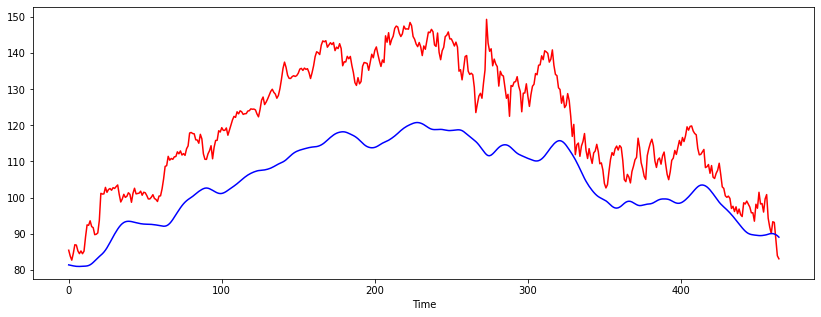

In [32]:
#visualization
plt.figure(figsize=(14,5))
plt.plot(y_test,color="red",label="Real google stock price")
plt.plot(y_pred,color="blue",label="Predicted google stock price")
plt.title = ('Google stock prices prediciton')
plt.xlabel('Time')
plt.ylabel=('google stock price')
plt.legend
plt.show()
